<a href="https://colab.research.google.com/github/singhsubbham27/Diwali_Sales_Analysis/blob/main/Untitled23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from io import IncrementalNewlineDecoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/content/car_prices.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for converting categorical variables into numerical representations
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Importing MinMaxScaler and StandardScaler for feature scaling
import plotly.express as px  # Importing Plotly Express for interactive data visualization
import datetime  # Importing datetime module for working with dates and times
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting dataset into train and test sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Importing evaluation metrics for regression models
from sklearn.preprocessing import OneHotEncoder  # Importing OneHotEncoder for one-hot encoding categorical variables
from sklearn.linear_model import LinearRegression  # Importing LinearRegression model for regression analysis

In [3]:
df=pd.read_csv('/content/car_prices.csv')

In [4]:
df.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [6]:
df.describe()

year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000

In [7]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [8]:
# Presenting the number of columns in the dataset
print(f"Columns in the dataset {df.shape[0]} Row in the dataset {df.shape[1]}")

# Drop the row with the any missing values from the dataset

df=df.dropna()

# Print the number of rows nad columns after removing the all missing values from the datset

print(f'Dataset have {df.shape[0]} Rows and {df.shape[1]} columns after removing all null values')


Columns in the dataset 558837 Row in the dataset 16
Dataset have 472325 Rows and 16 columns after removing all null values


In [9]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

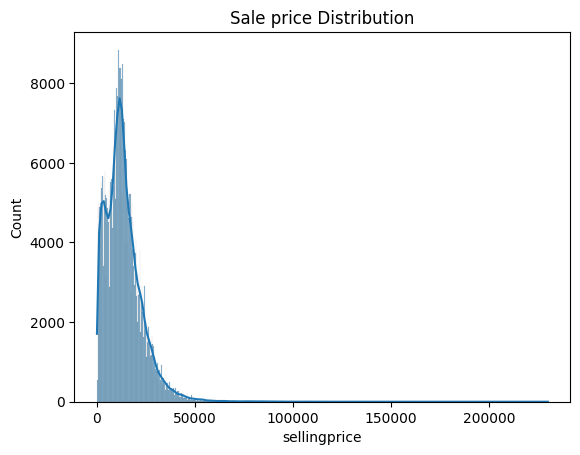

In [10]:
# Create a histogram for sale prices
fig_histogram=sns.histplot(df,x='sellingprice',kde=True)
plt.title('Sale price Distribution')
plt.show()

# Create a kernel density plot of sale prices
fig_density = px.density_contour(df, x='sellingprice', title='Sale Price Distribution (Kernel Density)')

# Show the histogram figure
plt.show()

# Show the kernel density plot figure
fig_density.show()

In [11]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [12]:
df.describe()

year      condition       odometer            mmr  \
count  472325.000000  472325.000000  472325.000000  472325.000000   
mean     2010.210980      30.774177   66701.732040   13837.058964   
std         3.822151      13.286866   51939.586894    9532.229273   
min      1990.000000       1.000000       1.000000      25.000000   
25%      2008.000000      24.000000   28137.000000    7425.000000   
50%      2012.000000      35.000000   51085.000000   12300.000000   
75%      2013.000000      41.000000   96590.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  472325.000000  
mean    13690.512058  
std      9613.033738  
min         1.000000  
25%      7200.000000  
50%     12200.000000  
75%     18200.000000  
max    230000.000000

In [ ]:
# List of the categorical variables to encode
categorical_cols= ['make','model','trim','body','transmission','vin','state','state','color','interior','seller']

# One-hot encode categorical variables
df_encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

# Label encode categorical variable in the origibal DataFrame
label_encoder=LabelEncoder()
for col in categorical_cols:
  df[col]=label_encoder.fit_transform(df[col].astype(str))

#check the encoder DataFrame
print(df_encoded.head(2))